# Betas v2

## Import libraries

In [1]:
first_folder_path = '../../../'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
from geopandas.tools import overlay
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import random
import scipy.stats as stats

import os
import sys
module_path = os.path.abspath(os.path.join(first_folder_path))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup
else:
    import aup

## Load data

In [3]:
rutas_edges_var = gpd.read_file(first_folder_path + f"data/processed/volvo/encuestas/03_rutas_en_edges/rutas_edges_var.gpkg")

# Show
print(f"{len(rutas_edges_var.code.unique())} unique codes.")
print(rutas_edges_var.crs)
print(rutas_edges_var.shape)
rutas_edges_var.head(2)

201 unique codes.
EPSG:32613
(1882, 21)


,code,u,v,key,grade_abs,ndvi_mean,entropy,sidewalk_available,no_sidewalk_available,banqueta_pct,...,pobtot_v,total_pobtot,average_population,dens_u,dens_v,average_density,interdens_u,interdens_v,average_intersdens,geometry
0,JC1V008,66819495228861751,66820751228869398,0,0.012849,0.15356,1.726807,316.602353,0.0,1.0,...,70.0,172.0,86.0,65.5488,50.632364,58.090582,12.761922,12.153251,12.457586,"MULTILINESTRING ((668194.953 2288617.514, 6682..."
1,MeV1V006,66819495228861751,66820751228869398,0,0.012849,0.15356,1.726807,316.602353,0.0,1.0,...,70.0,172.0,86.0,65.5488,50.632364,58.090582,12.761922,12.153251,12.457586,"MULTILINESTRING ((668194.953 2288617.514, 6682..."


In [4]:
final_routes = gpd.read_file(first_folder_path + f"data/processed/volvo/encuestas/02_rutas_dibujadas/final_routes.gpkg")

# Show
print(f"{len(final_routes.Código.unique())} unique codes.")
print(final_routes.crs)
print(final_routes.shape)
final_routes.head(2)

201 unique codes.
EPSG:32613
(201, 70)


,Código,layer,path,field_1,field_2,field_3,field_4,field_5,field_6,field_7,...,field_59,field_60,field_61,field_62,field_63,field_64,field_65,field_66,field_67,geometry
0,DP3V002,Rutas Danaé,C:/Users/sarah/Desktop/Levantamiento VREF/UNI...,252,9/19/24 18:40:07,9/19/24 18:46:58,anonymous,None,None,DP,...,De acuerdo,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",Totalmente de acuerdo,Totalmente de acuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,"LINESTRING (660511.087 2283608.716, 660443.453..."
1,DP3V005,Rutas Danaé,C:/Users/sarah/Desktop/Levantamiento VREF/UNI...,255,9/19/24 18:50:40,9/19/24 18:57:14,anonymous,None,None,DP,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,En desacuerdo,De acuerdo,De acuerdo,"LINESTRING (660562.586 2283275.252, 660591.611..."


## Merge data

In [5]:
# Drop final_routes's geom
final_routes_merge = final_routes.copy()
final_routes_merge.drop(columns=['geometry'],inplace=True)
# Merge
merged = pd.merge(rutas_edges_var,final_routes_merge, left_on='code',right_on='Código')

print(f"{len(merged.code.unique())} unique codes.")
print(merged.shape)
merged.head(2)

201 unique codes.
(1882, 90)


,code,u,v,key,grade_abs,ndvi_mean,entropy,sidewalk_available,no_sidewalk_available,banqueta_pct,...,field_58,field_59,field_60,field_61,field_62,field_63,field_64,field_65,field_66,field_67
0,JC1V008,66819495228861751,66820751228869398,0,0.012849,0.15356,1.726807,316.602353,0.0,1.0,...,En desacuerdo,De acuerdo,De acuerdo,En desacuerdo,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,Totalmente de acuerdo
1,MeV1V006,66819495228861751,66820751228869398,0,0.012849,0.15356,1.726807,316.602353,0.0,1.0,...,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente de acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,Totalmente de acuerdo


## __Columns renaming__

In [6]:
merged.columns

Index(['code', 'u', 'v', 'key', 'grade_abs', 'ndvi_mean', 'entropy',
       'sidewalk_available', 'no_sidewalk_available', 'banqueta_pct',
       'pobtot_u', 'pobtot_v', 'total_pobtot', 'average_population', 'dens_u',
       'dens_v', 'average_density', 'interdens_u', 'interdens_v',
       'average_intersdens', 'geometry', 'Código', 'layer', 'path', 'field_1',
       'field_2', 'field_3', 'field_4', 'field_5', 'field_6', 'field_7',
       'field_8', 'field_9', 'field_10', 'field_11', 'field_13', 'field_14',
       'field_15', 'field_16', 'field_17', 'field_18', 'field_19', 'field_20',
       'field_21', 'field_22', 'field_23', 'field_24', 'field_25', 'field_26',
       'field_27', 'field_28', 'field_29', 'field_30', 'field_31', 'field_32',
       'field_33', 'field_34', 'field_35', 'field_36', 'field_37', 'field_38',
       'field_39', 'field_40', 'field_41', 'field_42', 'field_43', 'field_44',
       'field_45', 'field_46', 'field_47', 'field_48', 'field_49', 'field_50',
       'field

### Change cols 'field' to original poll question for better comprehension

In [7]:
column_map = {
    'field_1': 'ID',
    'field_2': 'Hora de inicio',
    'field_3': 'Hora de finalización',
    'field_4': 'Correo electrónico',
    'field_5': 'Nombre',
    'field_6': 'Hora de la última modificación',
    'field_7': 'Encuestador',
    'field_8': 'Fecha de realización',
    'field_9': 'Encuesta #',
    'field_10': 'Num. Territorio de análisis',
    'field_11': 'Territorio de análisis',
    'field_13': 'Lugar donde se realizó la encuesta',
    'field_14': 'Género',
    'field_15': 'Edad (años)',
    'field_16': 'Estrato socioeconómico (NO APLICA)',
    'field_17': 'Ocupación principal',
    'field_18': 'Nivel educativo completado',
    'field_19': '¿Poseen alguno de los siguientes vehículos en su vivienda?',
    'field_20': 'Indique su lugar de residencia (Municipio/comuna/barrio)',
    'field_21': '¿Hace uso de algún equipamiento/sitio de interés localizado en el sector/territorio?',
    'field_22': '¿Cómo suple las necesidades de equipamientos educativos?',
    'field_23': '¿Cómo suple las necesidades de equipamientos de cultura o deportivos?',
    'field_24': '¿Cuáles?',
    'field_25': '¿Hacia qué tipo de equipamiento/sitio de interés se dirige?',
    'field_26': '¿Qué medio de transporte utilizó para llegar al equipamiento X? (último viaje realizado)',
    'field_27': 'En una semana típica, ¿Cuántas veces realiza este mismo viaje utilizando el mismo modo de transporte?',
    'field_28': 'En una semana típica, ¿Cuántas veces realiza este mismo viaje utilizando la caminata como modo de transporte? (CAMINATA)',
    'field_29': 'Debido a la lejanía del equipamiento X',
    'field_30': 'Debido a la ausencia de andenes',
    'field_31': 'Porque no me siento seguro/a frente a otros vehículos',
    'field_32': 'Porque no me siento seguro/a frente a posibles delitos en mi trayecto',
    'field_33': 'Debido al esfuerzo que debo hacer a causa de la pendiente de las calles',
    'field_34': 'Debido a que no me siento cómodo/a por el calor',
    'field_35': 'Debido a que siento que los andenes muy saturados de gente',
    'field_36': 'Debido a que el paisaje a lo largo del recorrido no es agradable',
    'field_37': 'La cercanía del equipamiento X',
    'field_38': 'La presencia de andenes',
    'field_39': 'Sentirme seguro/a frente a otros vehículos',
    'field_40': 'Sentirme seguro/a frente a posibles delitos en mi trayecto',
    'field_41': 'La posibilidad de hacer múltiples vueltas/trámites en mi recorrido',
    'field_42': 'La posibilidad de poder tomar desvíos y hacer múltiples trayectos en mi recorrido',
    'field_43': 'Sentirme cómodo/a por la sombra generada por la vegetación',
    'field_44': 'Sentirme cómodo/a en términos de la cantidad de gente a lo largo de mi recorrido',
    'field_45': 'Que el paisaje sea agradable',
    'field_46': '¿Se encuentra usted en alguna condición de discapacidad?',
    'field_47': 'Indique cuál de las siguientes condiciones de discapacidad presenta',
    'field_48': 'Indique el lugar donde inició de su recorrido lo más preciso posible (Punto de referencia, intersección más cercana)',
    'field_49': 'Indique la hora de salida de su lugar de origen de recorrido (formato militar)',
    'field_50': 'Ingrese los minutos de salida',
    'field_51': 'Indique el lugar de destino de su recorrido lo más precios posible\xa0(Punto de referencia, intersección más cercana)',
    'field_52': '¿Cuánto tiempo le tomó el recorrido caminando para legar a su lugar de destino? (Ingresar en minutos)',
    'field_53': 'Describa la ruta que tomó para este último viaje desde su lugar de origen hasta su lugar de destino. Puede utilizar direcciones y/o lugares conocidos de referencia para facilitar la identificación...',
    'field_54': '¿Por qué razón utiliza la CAMINATA como medio de transporte?',
    'field_55': '¿Qué modo de transporte alternativo utiliza cuando por alguna razón no puede utilizar la caminata como modo de transporte?',
    'field_56': 'Column',
    'field_57': '2',
    'field_58': '3',
    'field_59': '4',
    'field_60': '5',
    'field_61': '6',
    'field_62': '7',
    'field_63': '8',
    'field_64': '9',
    'field_65': '10',
    'field_66': '11',
    'field_67': '12'
}

merged.rename(columns=column_map,inplace=True)

### Standarize formats with Medellin's polls

In [8]:
standard_names = {
    'Estrato socioeconómico (NO APLICA)': 'Estrato socioeconómico',
    'La cercanía del equipamiento X': 'Qué tan importante es para usted la cercanía del equipamiento X',
    'La presencia de andenes': 'Qué tan importante es para usted la presencia de andenes',
    'Sentirme seguro/a frente a otros vehículos': 'Qué tan importante es para usted sentirse seguro/a frente a otros vehículos',
    'Sentirme seguro/a frente a posibles delitos en mi trayecto': 'Qué tan importante es para usted sentirse seguro/a frente a posibles delitos en su trayecto',
    'La posibilidad de hacer múltiples vueltas/trámites en mi recorrido': 'Qué tan importante es para usted la posibilidad de hacer múltiples vueltas/trámites en su recorrido',
    'La posibilidad de poder tomar desvíos y hacer múltiples trayectos en mi recorrido': 'Qué tan importante es para usted la posibilidad de poder tomar desvíos y hacer múltiples trayectos en su recorrido',
    'Sentirme cómodo/a por la sombra generada por la vegetación': 'Qué tan importante es para usted sentirse cómodo/a por la sombra generada por la vegetación',
    'Sentirme cómodo/a en términos de la cantidad de gente a lo largo de mi recorrido': 'Qué tan importante es para usted sentirse cómodo/a en términos de la cantidad de gente a lo largo de mi recorrido',
    'Que el paisaje sea agradable': 'Qué tan importante es para usted que el paisaje sea agradable',
    'Column': '36. A lo largo de su recorrido, ¿Sientes que hay personas a tu alrededor que pudieran apoyarte en caso de algún problema?',
    '2': '37. A lo largo de su recorrido, ¿Sientes que hay diversas intersecciones que te permiten cruzar las calles de manera segura?',
    '3': '38. ¿Se te hace largo y aburrido el recorrido?',
    '4': '39. A lo largo de tu recorrido, ¿Es posible desviarse en múltiples puntos/intersecciones para cambiar de ruta?',
    '5': '40. A lo largo de tu recorrido, ¿Puedes aprovechar para acceder a múltiples servicios y satisfacer necesidades diversas (realizar vueltas/pendientes, comprar alimentos, divertirse, etc.)?',
    '6': '41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?',
    '7': '42. A lo largo de tu recorrido, ¿Encuentras elementos que hacen que tu caminata sea poco monótona?',
    '8': '43. A lo largo de tu recorrido, ¿Sientes que el tipo de vegetación te genera sombra y protección del sol?',
    '9': '44. A lo largo de tu recorrido, ¿Sientes que la presencia y el tipo de vegetación crea un entorno agradable?',
    '10': '45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar te implicó un gran esfuerzo físico debido a la pendiente/inclinación?',
    '11': '46. A lo largo de tu recorrido, ¿Te sientes seguro(a) ante la presencia de vehículos?',
    '12': '47. A lo largo de tu recorrido, ¿Sientes que la continuidad de andenes te permite caminar de manera cómoda (no hay: cambios de niveles, interrupciones repentinas del andén, presencia de obstáculos, cambios en el ancho del andén, etc.)?',
    '¿Cuáles?': '¿Cuáles equipamientos de interés en el sector utilizas?'
}

merged.rename(columns=standard_names, inplace=True)

# Show
merged.columns

Index(['code', 'u', 'v', 'key', 'grade_abs', 'ndvi_mean', 'entropy',
       'sidewalk_available', 'no_sidewalk_available', 'banqueta_pct',
       'pobtot_u', 'pobtot_v', 'total_pobtot', 'average_population', 'dens_u',
       'dens_v', 'average_density', 'interdens_u', 'interdens_v',
       'average_intersdens', 'geometry', 'Código', 'layer', 'path', 'ID',
       'Hora de inicio', 'Hora de finalización', 'Correo electrónico',
       'Nombre', 'Hora de la última modificación', 'Encuestador',
       'Fecha de realización', 'Encuesta #', 'Num. Territorio de análisis',
       'Territorio de análisis', 'Lugar donde se realizó la encuesta',
       'Género', 'Edad (años)', 'Estrato socioeconómico',
       'Ocupación principal', 'Nivel educativo completado',
       '¿Poseen alguno de los siguientes vehículos en su vivienda?',
       'Indique su lugar de residencia (Municipio/comuna/barrio)',
       '¿Hace uso de algún equipamiento/sitio de interés localizado en el sector/territorio?',
       '¿

## __Data filter__

In [10]:
# Filter for "Si" in question refering to use of any public/comunity facility or point of interest located within the territory
#print(len(merged.code.unique()))
#merged_f = merged[merged['¿Hace uso de algún equipamiento/sitio de interés localizado en el sector/territorio?'] == 'Si']
#print(len(merged_f.code.unique()))

# Discard people with disabilities (Due to a non-representative amount of data)
print(len(merged.code.unique()))
merged_f = merged[merged['¿Se encuentra usted en alguna condición de discapacidad?'] != 'Si']
print(len(merged_f.code.unique()))

# Focus on people that used walking as a mean of transportation on their last trip
merged_f = merged_f[merged_f["¿Qué medio de transporte utilizó para llegar al equipamiento X? (último viaje realizado)"] == "Caminata"]
print(len(merged_f.code.unique()))

# Show
print(merged_f.crs)
print(merged_f.shape)
merged_f.head(2)

201
196
195
EPSG:32613
(1802, 90)


,code,u,v,key,grade_abs,ndvi_mean,entropy,sidewalk_available,no_sidewalk_available,banqueta_pct,...,38. ¿Se te hace largo y aburrido el recorrido?,"39. A lo largo de tu recorrido, ¿Es posible desviarse en múltiples puntos/intersecciones para cambiar de ruta?","40. A lo largo de tu recorrido, ¿Puedes aprovechar para acceder a múltiples servicios y satisfacer necesidades diversas (realizar vueltas/pendientes, comprar alimentos, divertirse, etc.)?","41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?","42. A lo largo de tu recorrido, ¿Encuentras elementos que hacen que tu caminata sea poco monótona?","43. A lo largo de tu recorrido, ¿Sientes que el tipo de vegetación te genera sombra y protección del sol?","44. A lo largo de tu recorrido, ¿Sientes que la presencia y el tipo de vegetación crea un entorno agradable?","45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar te implicó un gran esfuerzo físico debido a la pendiente/inclinación?","46. A lo largo de tu recorrido, ¿Te sientes seguro(a) ante la presencia de vehículos?","47. A lo largo de tu recorrido, ¿Sientes que la continuidad de andenes te permite caminar de manera cómoda (no hay: cambios de niveles, interrupciones repentinas del andén, presencia de obstáculos, cambios en el ancho del andén, etc.)?"
0,JC1V008,66819495228861751,66820751228869398,0,0.012849,0.153560,1.726807,316.602353,0.0,1.0,...,En desacuerdo,De acuerdo,De acuerdo,En desacuerdo,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,Totalmente de acuerdo
2,JC1V008,66820751228869398,66821647228874845,0,0.000000,0.159422,1.487973,272.033757,0.0,1.0,...,En desacuerdo,De acuerdo,De acuerdo,En desacuerdo,"Ni de acuerdo, ni en desacuerdo","Ni de acuerdo, ni en desacuerdo",De acuerdo,Totalmente en desacuerdo,Totalmente de acuerdo,Totalmente de acuerdo


## __Convert qualitative data to quantitative data__

In [11]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoding(df, columna, orden):
    # Inicializar el OrdinalEncoder con handle_unknown  
    enc = OrdinalEncoder(categories=[orden], handle_unknown='use_encoded_value', unknown_value=np.nan)    
    
    columnadf = df[[columna]]
    # Defino la jerarquía u orden de las categorías, de menor a mayor
    # (el número que se le asignará a cada uno dependerá de esto: 0 al primer elemento, 1 al segundo, etc...)
    orden = orden

    # Crear el encoder
    enc = OrdinalEncoder(categories=[orden])

    # Aplicar el encoding
    columnanew = enc.fit_transform(columnadf)

    # Pegar la columna al dataframe de elegidas
    df.loc[:, columna] = columnanew
    df[columna] = pd.to_numeric(df[columna])
    
    return df

In [12]:
perception_columns = ['36. A lo largo de su recorrido, ¿Sientes que hay personas a tu alrededor que pudieran apoyarte en caso de algún problema?', 
                       '37. A lo largo de su recorrido, ¿Sientes que hay diversas intersecciones que te permiten cruzar las calles de manera segura?', 
                       '38. ¿Se te hace largo y aburrido el recorrido?', 
                       '39. A lo largo de tu recorrido, ¿Es posible desviarse en múltiples puntos/intersecciones para cambiar de ruta?', 
                       '40. A lo largo de tu recorrido, ¿Puedes aprovechar para acceder a múltiples servicios y satisfacer necesidades diversas (realizar vueltas/pendientes, comprar alimentos, divertirse, etc.)?', 
                       '41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?', 
                       '42. A lo largo de tu recorrido, ¿Encuentras elementos que hacen que tu caminata sea poco monótona?', 
                       '43. A lo largo de tu recorrido, ¿Sientes que el tipo de vegetación te genera sombra y protección del sol?', 
                       '44. A lo largo de tu recorrido, ¿Sientes que la presencia y el tipo de vegetación crea un entorno agradable?', 
                       '45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar te implicó un gran esfuerzo físico debido a la pendiente/inclinación?', 
                       '46. A lo largo de tu recorrido, ¿Te sientes seguro(a) ante la presencia de vehículos?', 
                       '47. A lo largo de tu recorrido, ¿Sientes que la continuidad de andenes te permite caminar de manera cómoda (no hay: cambios de niveles, interrupciones repentinas del andén, presencia de obstáculos, cambios en el ancho del andén, etc.)?']

# Define hierarchy
# (Value will be assigned according to order list. 0 to first element, 1 to second, etc...)
# Then values will be substracted by 2 to generate range [-2,2]
order = ['Totalmente en desacuerdo', 'En desacuerdo', 'Ni de acuerdo, ni en desacuerdo', 'De acuerdo', 'Totalmente de acuerdo']
    
for column in perception_columns:
    merged_f = ordinal_encoding(merged_f, column, order)
    merged_f[column] = merged_f[column] - 2
    merged_f[column] = pd.to_numeric(merged_f[column])

# Show
merged_f[perception_columns].head(2)

,"36. A lo largo de su recorrido, ¿Sientes que hay personas a tu alrededor que pudieran apoyarte en caso de algún problema?","37. A lo largo de su recorrido, ¿Sientes que hay diversas intersecciones que te permiten cruzar las calles de manera segura?",38. ¿Se te hace largo y aburrido el recorrido?,"39. A lo largo de tu recorrido, ¿Es posible desviarse en múltiples puntos/intersecciones para cambiar de ruta?","40. A lo largo de tu recorrido, ¿Puedes aprovechar para acceder a múltiples servicios y satisfacer necesidades diversas (realizar vueltas/pendientes, comprar alimentos, divertirse, etc.)?","41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?","42. A lo largo de tu recorrido, ¿Encuentras elementos que hacen que tu caminata sea poco monótona?","43. A lo largo de tu recorrido, ¿Sientes que el tipo de vegetación te genera sombra y protección del sol?","44. A lo largo de tu recorrido, ¿Sientes que la presencia y el tipo de vegetación crea un entorno agradable?","45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar te implicó un gran esfuerzo físico debido a la pendiente/inclinación?","46. A lo largo de tu recorrido, ¿Te sientes seguro(a) ante la presencia de vehículos?","47. A lo largo de tu recorrido, ¿Sientes que la continuidad de andenes te permite caminar de manera cómoda (no hay: cambios de niveles, interrupciones repentinas del andén, presencia de obstáculos, cambios en el ancho del andén, etc.)?"
0,2.0,2.0,-1.0,1.0,1.0,-1.0,0.0,0.0,1.0,-2.0,2.0,2.0
2,2.0,2.0,-1.0,1.0,1.0,-1.0,0.0,0.0,1.0,-2.0,2.0,2.0


In [14]:
merged_f.to_file(first_folder_path + f"data/processed/volvo/encuestas/03_rutas_en_edges/poll_vars.gpkg")

## __Invert quantitative questions__

In [13]:
# Invert question 38 and its answers
merged_f['38. ¿Se te hace largo y aburrido el recorrido?'] = merged_f['38. ¿Se te hace largo y aburrido el recorrido?']*(-1)
merged_f = merged_f.rename(columns={'38. ¿Se te hace largo y aburrido el recorrido?': '38. ¿Se te hace corto y agradable el recorrido?'})
# Invert question 41 and its answers
merged_f['41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?'] = merged_f['41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?']*(-1)
merged_f = merged_f.rename(columns={'41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?': '41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar NO se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?'})
# Invert question 45 and its answers
merged_f['45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar te implicó un gran esfuerzo físico debido a la pendiente/inclinación?'] = merged_f['45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar te implicó un gran esfuerzo físico debido a la pendiente/inclinación?']*(-1)
merged_f = merged_f.rename(columns={'45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar te implicó un gran esfuerzo físico debido a la pendiente/inclinación?': '45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar NO te implicó un gran esfuerzo físico debido a la pendiente/inclinación?'})

## __Relation between perception cols and physical variables__

In [14]:
# Analysed territories
TAs = ['TA_Miramar','TA_Providencia','TA_Colinas']

# Relation between variables and perception
variables_perception = {'average_density':['36. A lo largo de su recorrido, ¿Sientes que hay personas a tu alrededor que pudieran apoyarte en caso de algún problema?'],
                        'average_intersdens':['37. A lo largo de su recorrido, ¿Sientes que hay diversas intersecciones que te permiten cruzar las calles de manera segura?',
                                              '38. ¿Se te hace corto y agradable el recorrido?',
                                              '39. A lo largo de tu recorrido, ¿Es posible desviarse en múltiples puntos/intersecciones para cambiar de ruta?'],
                        'entropy':['40. A lo largo de tu recorrido, ¿Puedes aprovechar para acceder a múltiples servicios y satisfacer necesidades diversas (realizar vueltas/pendientes, comprar alimentos, divertirse, etc.)?', 
                                   '41. A lo largo de tu recorrido, ¿Sientes que la comodidad en tu caminar NO se ve influenciada por la cantidad de personas y actividades que se realizan en el andén?', 
                                   '42. A lo largo de tu recorrido, ¿Encuentras elementos que hacen que tu caminata sea poco monótona?'],
                        'ndvi_mean':['43. A lo largo de tu recorrido, ¿Sientes que el tipo de vegetación te genera sombra y protección del sol?',
                                     '44. A lo largo de tu recorrido, ¿Sientes que la presencia y el tipo de vegetación crea un entorno agradable?'],
                        'grade_abs':['45. A lo largo de tu recorrido, ¿Consideras que el hecho de caminar NO te implicó un gran esfuerzo físico debido a la pendiente/inclinación?'],
                        'sidewalk_available':['46. A lo largo de tu recorrido, ¿Te sientes seguro(a) ante la presencia de vehículos?',
                                              '47. A lo largo de tu recorrido, ¿Sientes que la continuidad de andenes te permite caminar de manera cómoda (no hay: cambios de niveles, interrupciones repentinas del andén, presencia de obstáculos, cambios en el ancho del andén, etc.)?']
                       }

summary_df = pd.DataFrame()
i=0
# For each analysed territory
for TA in TAs:
    print(f"Summarizing territory {TA}.")
    # Select TA's polls
    TA_polls = merged_f.loc[merged_f["Territorio de análisis"] == TA].copy()
    
    # For each poll
    for poll_code in TA_polls.code.unique():
        # Select current poll
        poll_edges = TA_polls.loc[TA_polls.code==poll_code].copy()

        # Register TA and poll code
        summary_df.loc[i,'Territory'] = TA
        summary_df.loc[i,'poll_code'] = poll_code
        
        # For each variable
        for var in variables_perception.keys():
            # VARIABLE
            # Register variable's mean
            summary_df.loc[i,var] = poll_edges[var].mean()

            # PERCEPTION
            # Select perception questions related to variable
            var_questions = variables_perception[var]
            # Calculate and store all perception question's mean answers
            question_means = []
            for question in var_questions:
                question_means.append(poll_edges[question].mean())
            # Register perception's mean
            summary_df.loc[i,f"{var}_q"] = np.mean(question_means)

        # Next poll
        i+=1

summary_df

Summarizing territory TA_Miramar.
Summarizing territory TA_Providencia.
Summarizing territory TA_Colinas.


,Territory,poll_code,average_density,average_density_q,average_intersdens,average_intersdens_q,entropy,entropy_q,ndvi_mean,ndvi_mean_q,grade_abs,grade_abs_q,sidewalk_available,sidewalk_available_q
0,TA_Miramar,DP3M040,183.616260,0.0,32.938878,0.000000,1.128517,0.000000,0.097529,0.0,0.032367,0.0,310.840149,0.0
1,TA_Miramar,RV3M016,187.453174,1.0,32.365403,1.333333,1.198553,-0.333333,0.090899,-2.0,0.023181,-1.0,312.417640,-0.5
2,TA_Miramar,DP3M045,189.424845,2.0,35.911767,0.333333,1.131240,0.333333,0.123846,-2.0,0.008557,2.0,213.983857,0.5
3,TA_Miramar,DP3M047,214.278287,1.0,38.768650,0.333333,0.798719,0.333333,0.101081,-1.0,0.016410,0.0,197.615302,-1.5
4,TA_Miramar,DP3V017,174.019559,1.0,31.551188,0.000000,1.407599,-0.333333,0.079063,0.0,0.015616,-2.0,312.895915,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,TA_Colinas,DP2V009,19.192109,2.0,10.621034,0.666667,0.615722,0.333333,0.107666,-0.5,0.011550,2.0,117.687056,-0.5
191,TA_Colinas,JM2V008,41.521581,2.0,8.794422,0.666667,0.622361,1.666667,0.128182,2.0,0.032812,-2.0,86.704235,-1.5
192,TA_Colinas,JM2V004,17.101945,0.0,11.396455,2.000000,0.547980,-0.666667,0.211434,2.0,0.000000,2.0,222.786468,-1.0
193,TA_Colinas,DS2V005,59.214066,2.0,11.378768,0.666667,0.624408,2.000000,0.217704,1.5,0.017182,-1.0,347.169253,1.5


In [22]:
cols_lst = list(variables_perception.keys())
cols_lst.append('Territory')

TA_Miramar
TA_Providencia
TA_Colinas


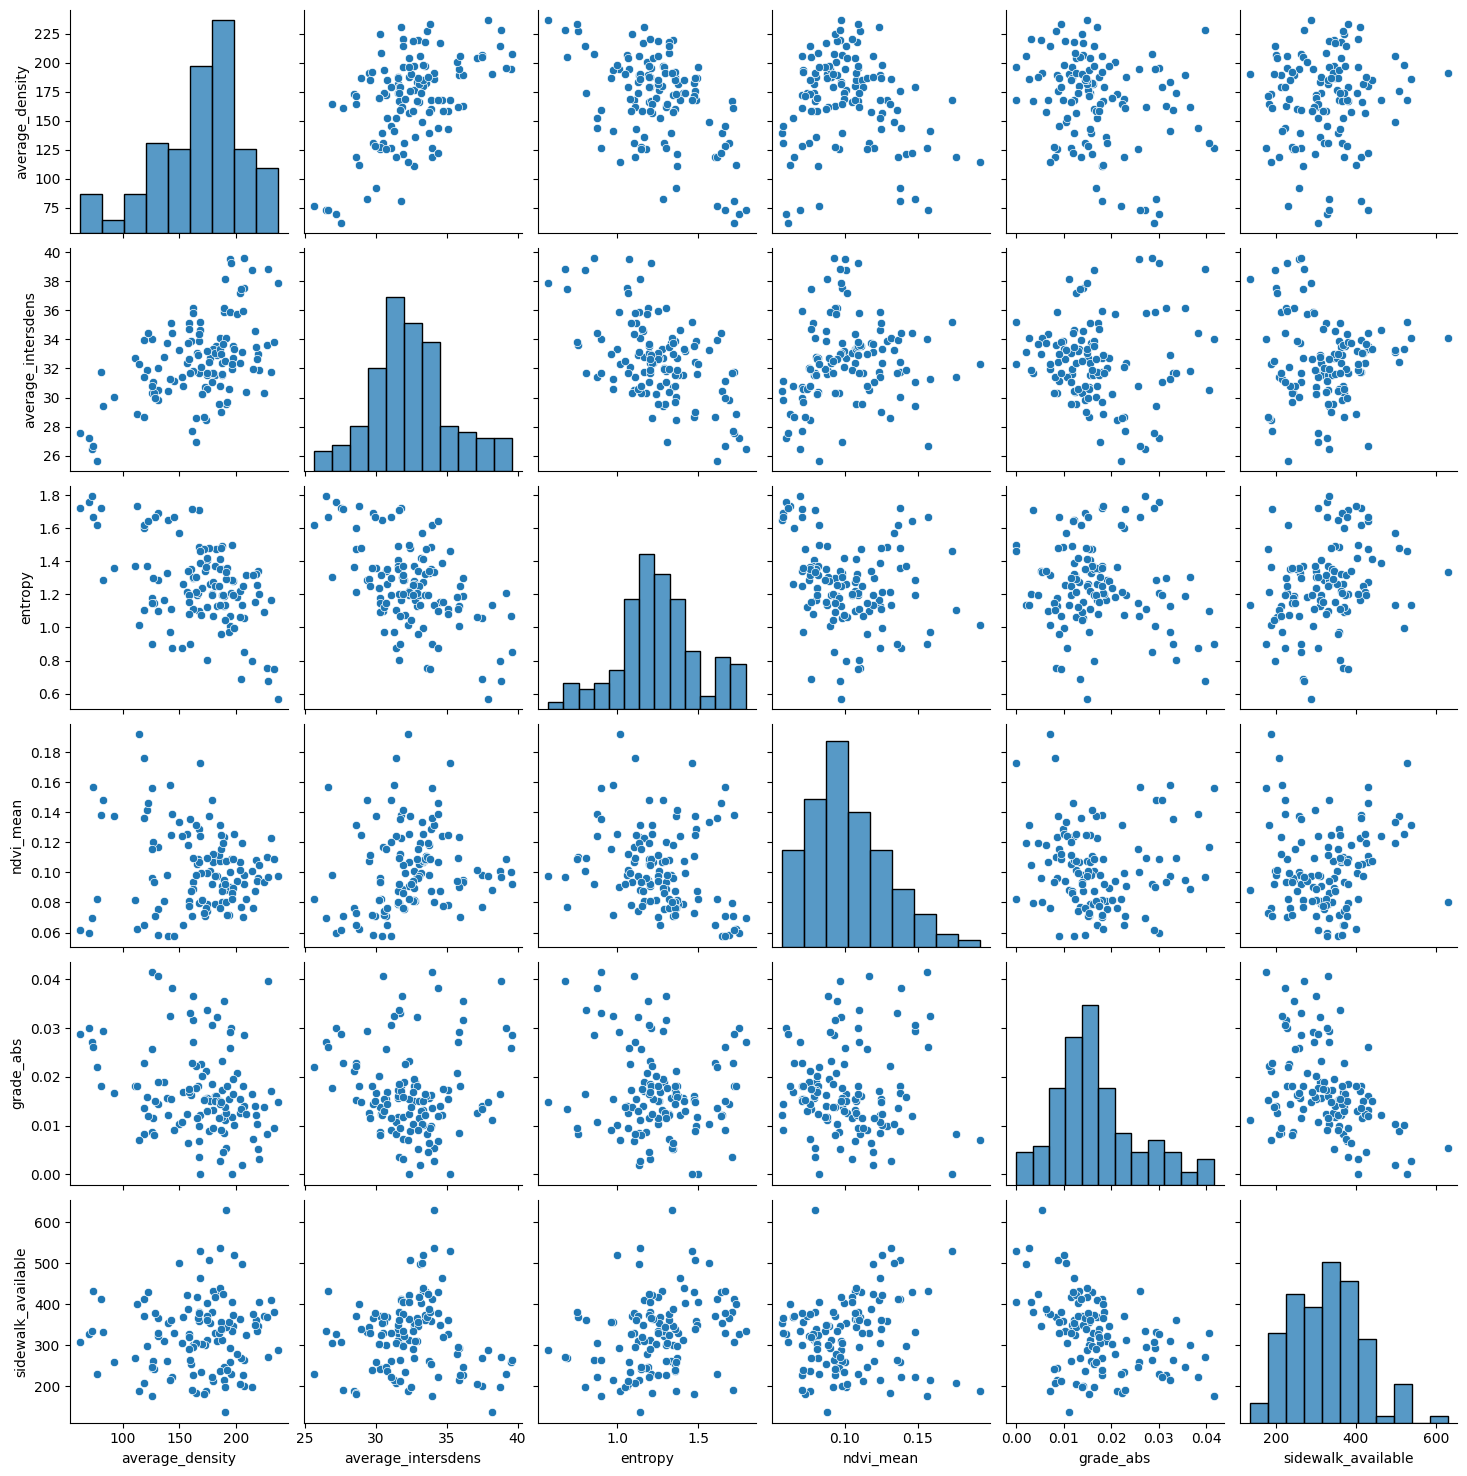

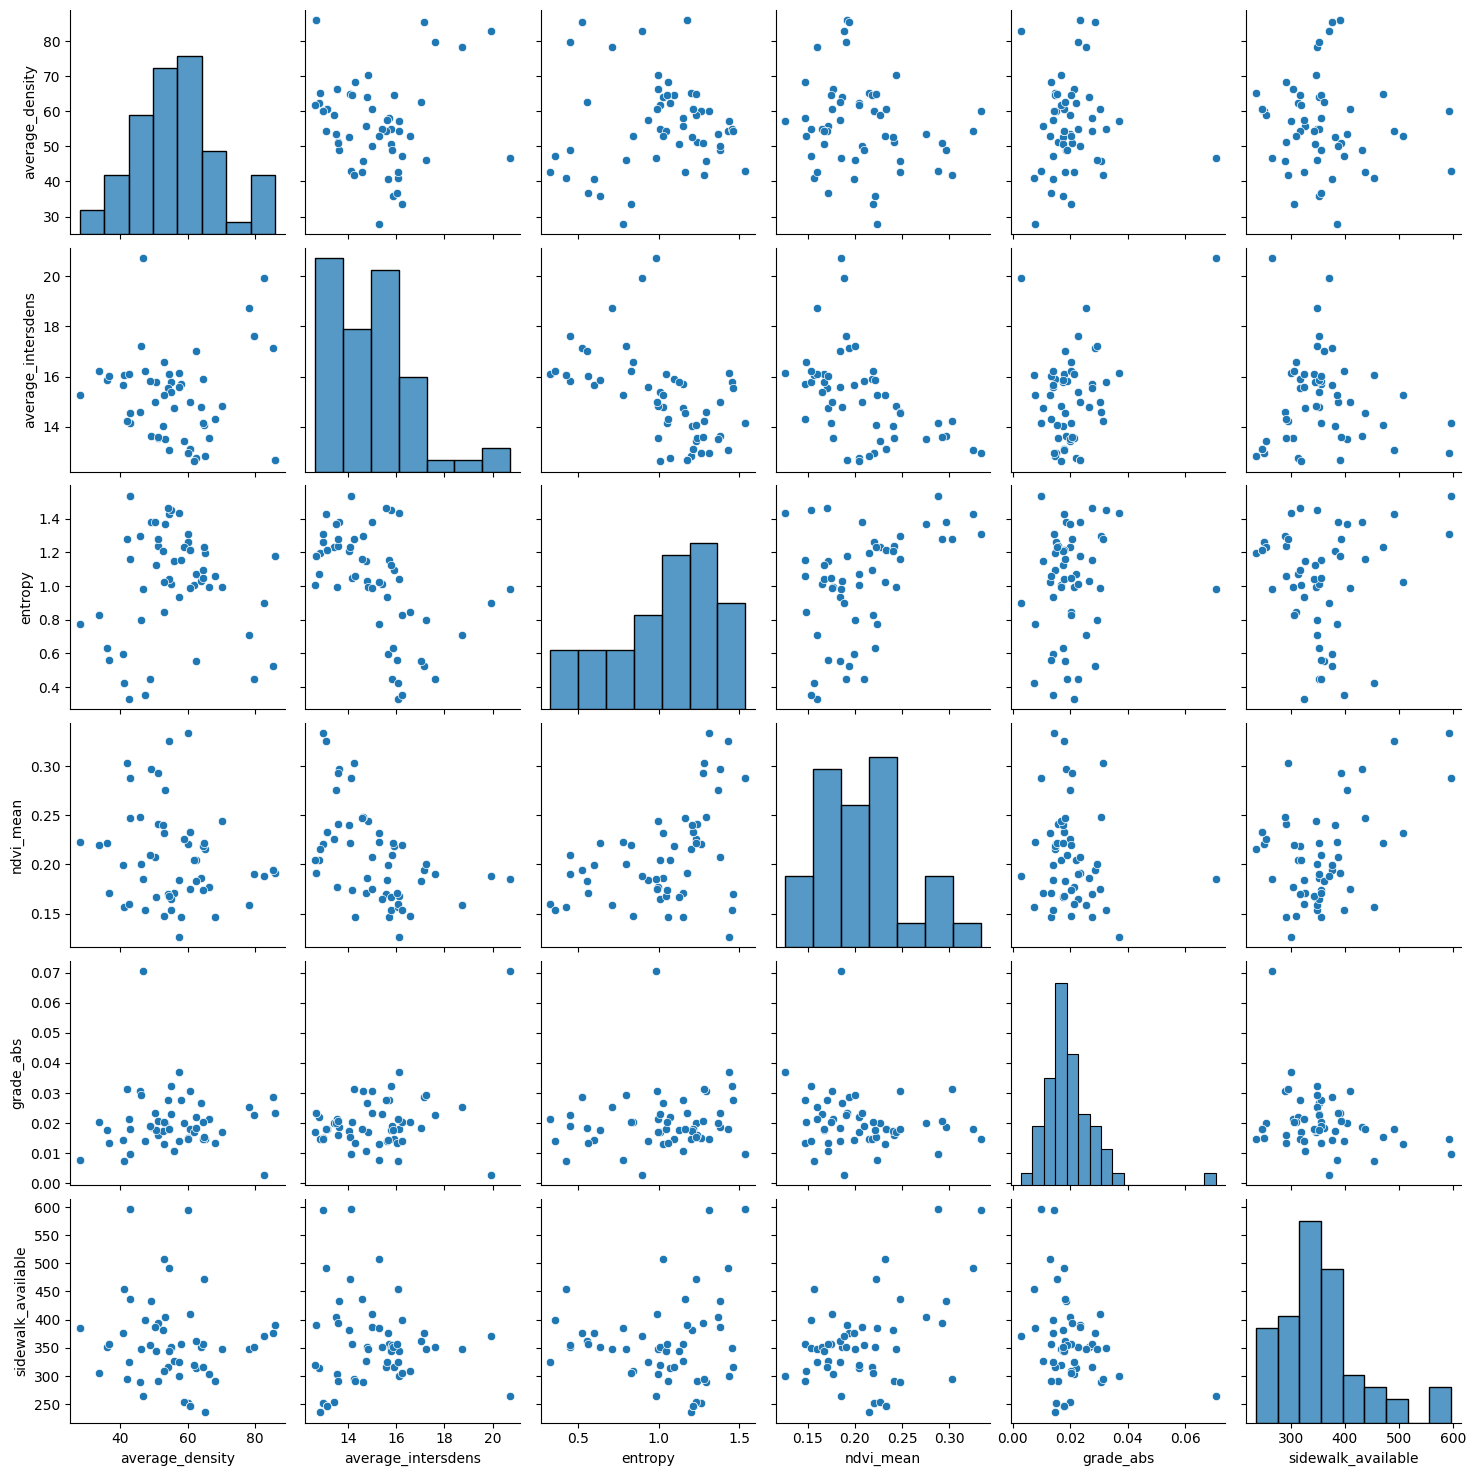

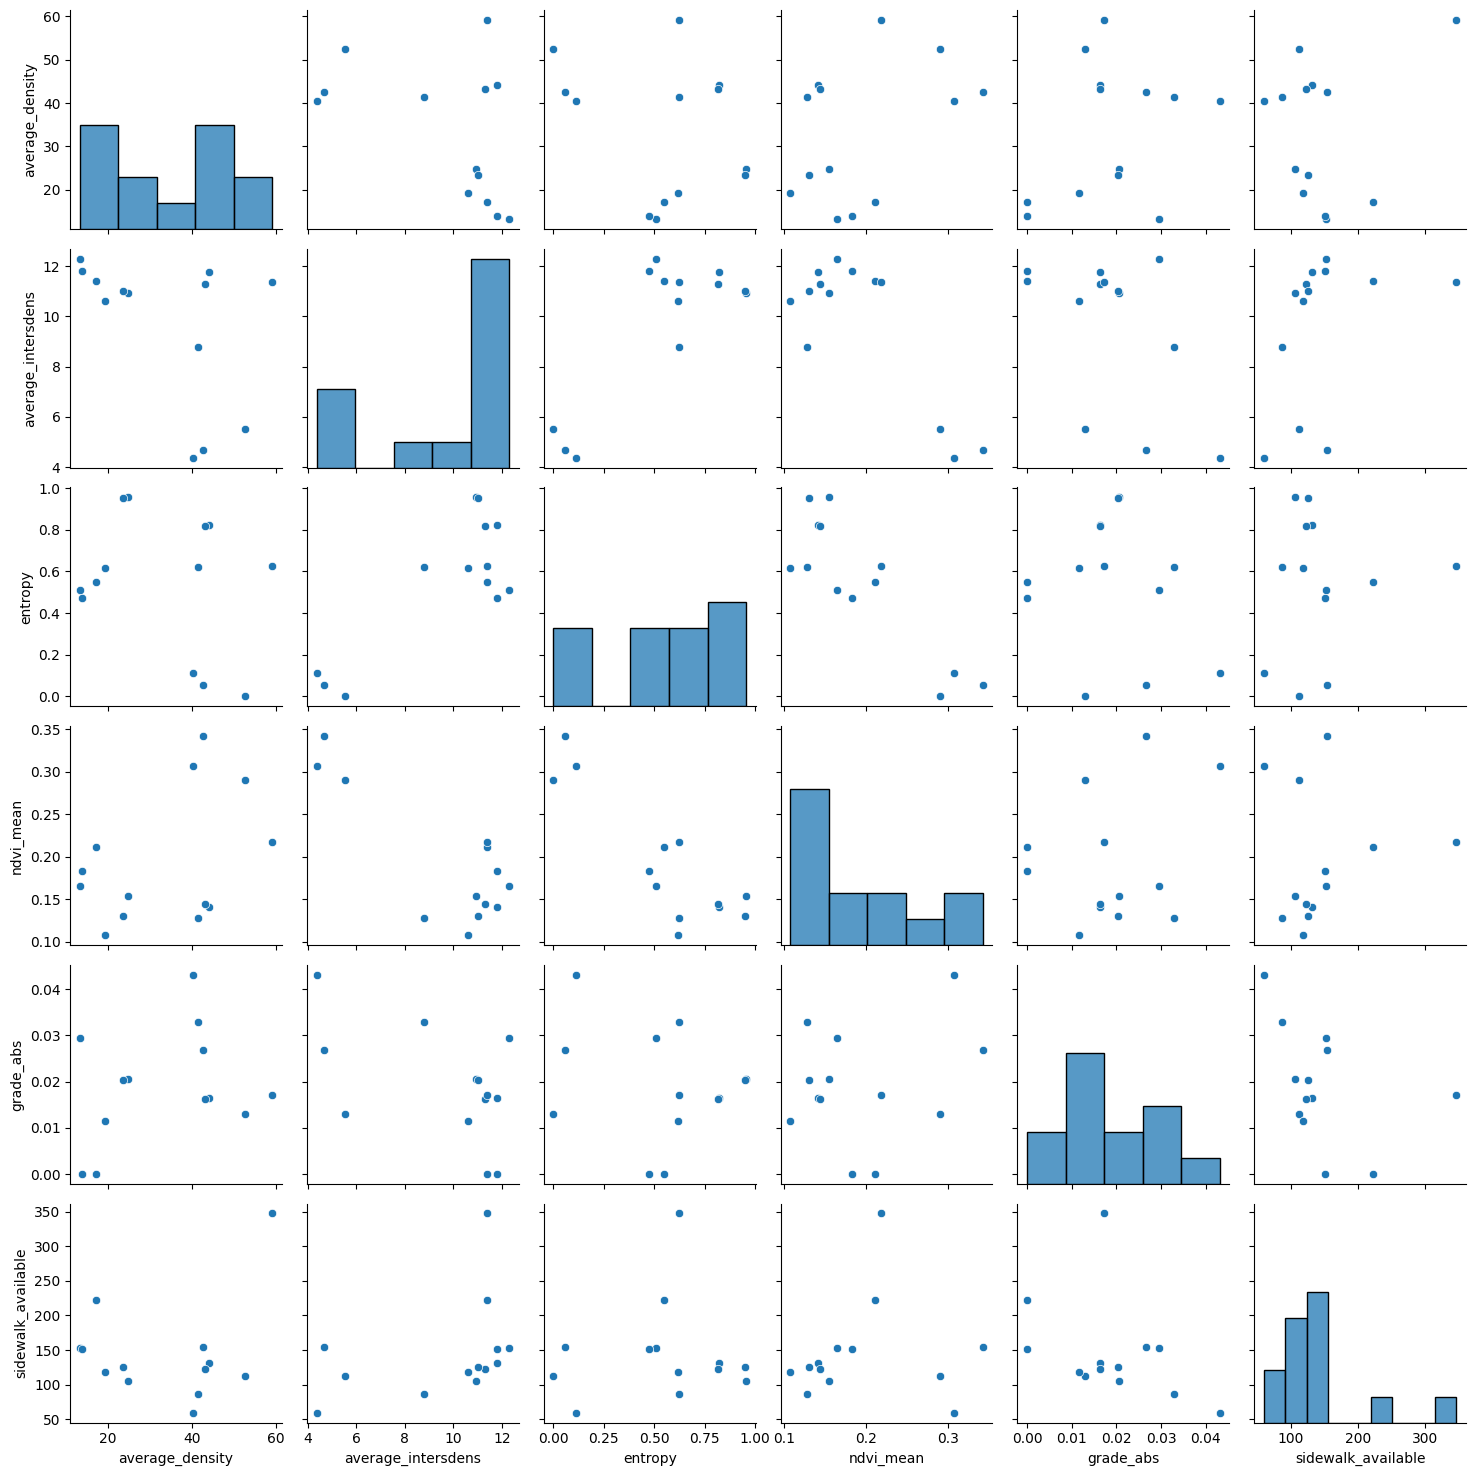

In [26]:
for TA in TAs:
    print(TA)
    TA_pairplots = summary_df.loc[summary_df["Territory"] == TA].copy()
    sns.pairplot(TA_pairplots[cols_lst])

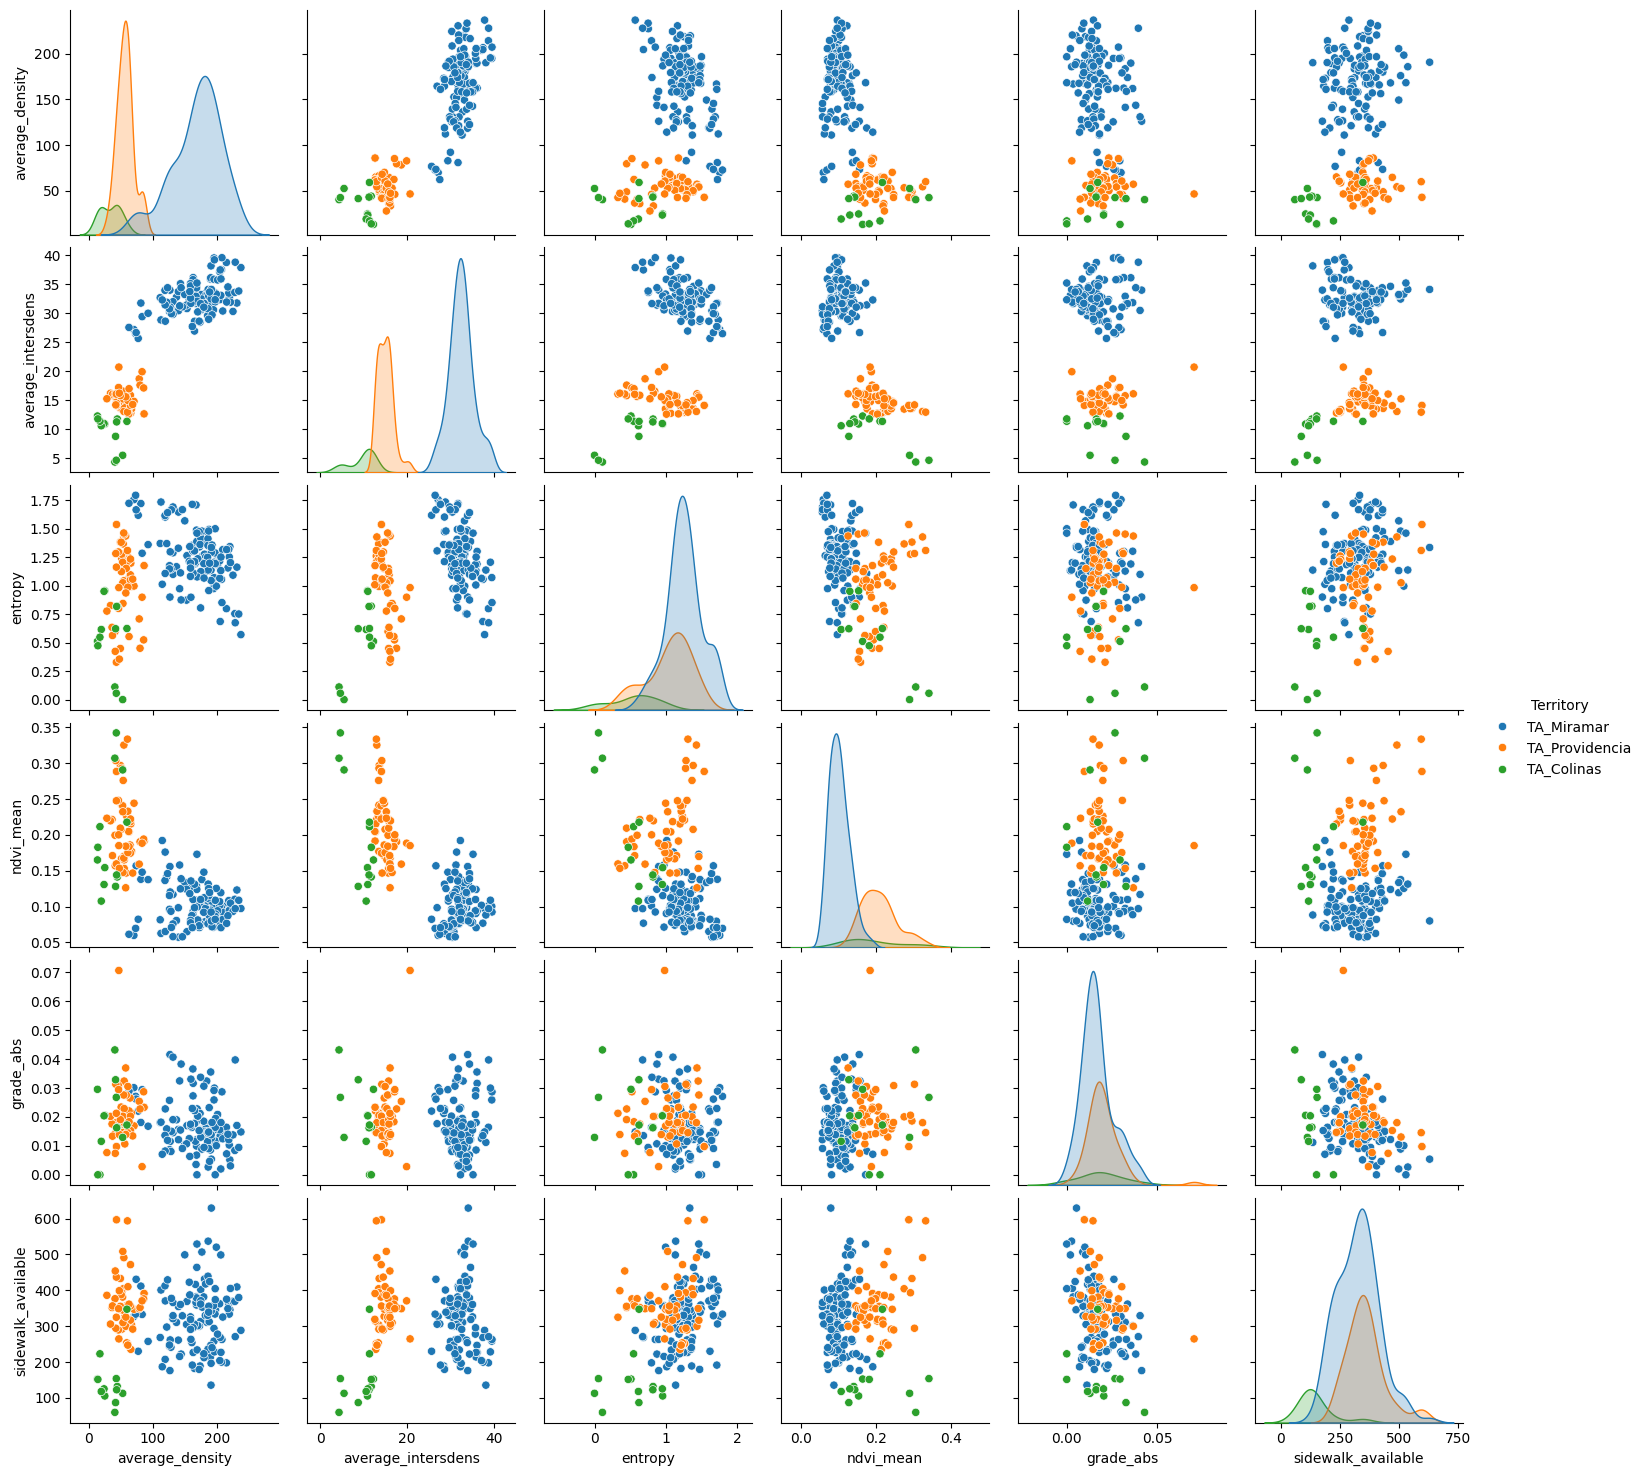

In [21]:
sns.pairplot(summary_df[cols_lst],hue='Territory')

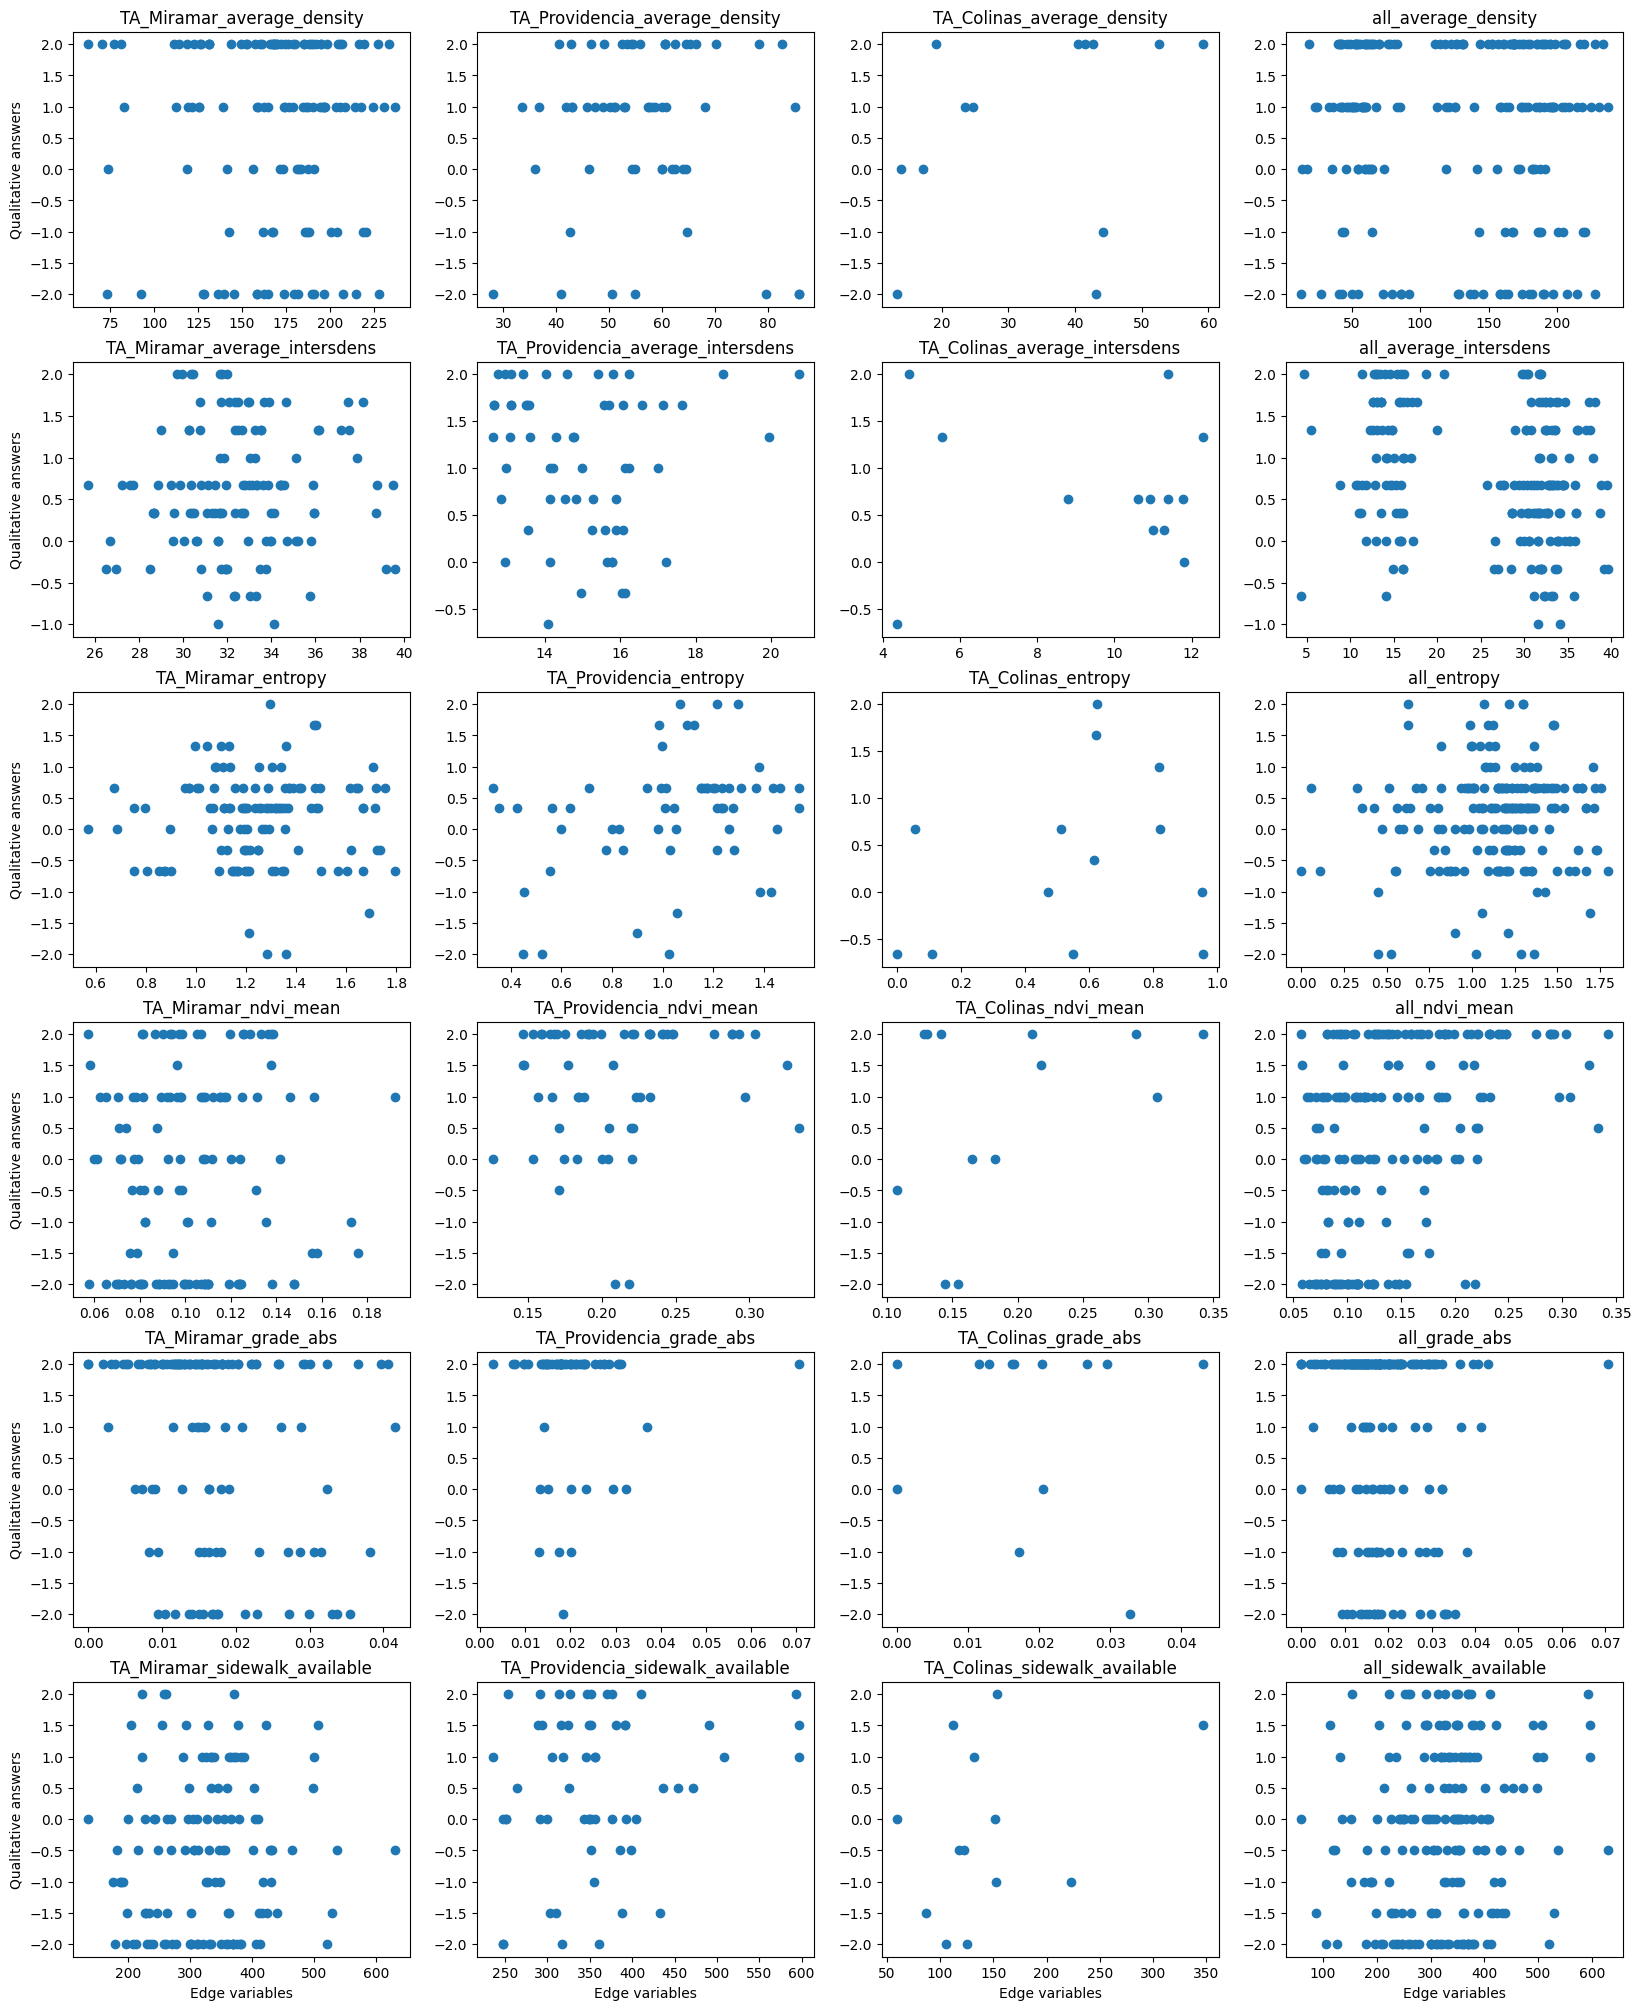

In [16]:
fig,axs = plt.subplots(6,4,figsize=(20,25))

# All six variables
six_variables = list(variables_perception.keys())

all_TAs = TAs.copy()
all_TAs.append('all')

i=0
for TA in all_TAs:

    if TA != 'all':
        territory_summary = summary_df.loc[summary_df.Territory==TA].copy()
    else:
        territory_summary = summary_df.copy()

    j=0
    for var in six_variables:
        # Plot variables
        axs[j,i].scatter(territory_summary[var], territory_summary[f"{var}_q"])

        # Set title
        axs[j,i].set_title(f"{TA}_{var}")
        
        # Format - Turn on last row/col tick marks and set used col label
        # y axis
        if i == 0:
            axs[j,i].get_yaxis().set_visible(True)
            axs[j,i].set_ylabel("Qualitative answers")
        # x axis    
        if j == len(six_variables) - 1:
            axs[j,i].get_xaxis().set_visible(True)
            axs[j,i].set_xlabel("Edge variables")
        
        j+=1
    i+=1

In [17]:
# Separar datas por polígono
    # Iterar sobre cada código de encuesta único.
        # Registrar Polígono
        # Registrar código de encuesta
        # Registrar promedio de la variable (e.g. average_density)
        # Registrar valor cuantitativo de las preguntas (promedio de las respuestas)

# Graficar, por polígono, por variable, en 'x' la variable física y en 'y' la percepción

# Obtener ecuación y=mx+2 o y= a2 + bx + c

# Con base en ecuación, obtener 'y' (Percepción estimada) de cada edge de cada polígono y generar mapas

# Cerrar branch walkability_index

# Abrir branch repository_preparation para limpiar funciones, unir cosas.